In [ ]:
#Data handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

%cd /content/drive/MyDrive/deeplearning/policeproject

Mounted at /content/drive
/content/drive/MyDrive/deeplearning/policeproject


In [ ]:
#data from the Mapping Police Violence 2011-2021
mpv = pd.read_excel('MPVDatasetDownload.xlsx', sheet_name='2013-2020 Police Killings')

vice = pd.read_excel('ViceNews_FullOISData.xlsx')

##Data Cleaning and Merging

In [ ]:
print(vice.columns)
print(mpv.columns)

Index(['Date', 'NumberOfSubjects', 'Fatal', 'SubjectArmed', 'SubjectRace',
       'SubjectGender', 'SubjectAge', 'NatureOfStop', 'NumberOfShots',
       'NumberOfOfficers', 'OfficerRace', 'OfficerGender', 'Department',
       'FullNarrative', 'City', 'Notes'],
      dtype='object')
Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Armed/Unarmed Status',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged T

In [ ]:
cols = {'Date':'Date of Incident (month/day/year)','SubjectArmed':'Armed/Unarmed Status', 'SubjectRace':"Victim's race",'SubjectGender':"Victim's gender", 'SubjectAge':"Victim's age",'OfficerRace':'Race of Officers Involved (DRAFT)'}

vice.rename(mapper=cols, axis=1, inplace=True)

In [ ]:
df = pd.concat([vice,mpv], keys='Date of Incident (month/day/year)')

What is the number of records we are investigating?

In [ ]:
#create fatal or nonfatal distinction
df.Fatal = df.Fatal.str.replace(' ', '')
df.Fatal = df.Fatal.str.replace('N', 'Nonfatal')
df.Fatal = df.Fatal.fillna(value='F')
df.Fatal = df.Fatal.str.replace('F', 'Fatal')
df.Fatal = df.Fatal.str.replace('U', 'Unknown')
df.Fatal.value_counts()

Fatal       10323
Nonfatal     2730
Unknown       288
Name: Fatal, dtype: int64

In [ ]:
#getting rid of the unknowns
df = df[df.Fatal != 'Unknown']
df.shape

(13053, 45)

What is the division of killings on gender? How does it differ between fatal and non fatal encounters?

In [ ]:
import re
df["Victim's gender"].value_counts()
df["Victim's gender"] = df["Victim's gender"].str.replace(' ', '')
df["Victim's gender"] = df["Victim's gender"].str.replace('M;U', 'Male', regex=True)
df["Victim's gender"] = df["Victim's gender"].replace(to_replace=r"M\b", value='Male',regex=True)
df["Victim's gender"] = df["Victim's gender"].replace(to_replace=r"F\b", value='Female',regex=True)
df["Victim's gender"] = df["Victim's gender"].replace(to_replace=r"U\b", value='Unknown',regex=True)
df["Victim's gender"].value_counts()

Male           11299
Unknown         1197
Female           536
Transgender        9
Name: Victim's gender, dtype: int64

In [ ]:
pd.crosstab(df["Victim's gender"],df["Fatal"])

Fatal,Fatal,Nonfatal
Victim's gender,,
Female,482,54
Male,9576,1723
Transgender,9,0
Unknown,246,951


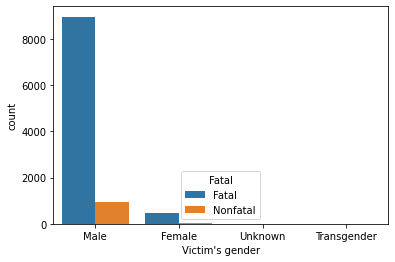

In [ ]:
sns.countplot(x="Victim's gender", hue="Fatal", data=df)

Are the differences between genders significant in terms of deaths?

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_gen = df
contigency= pd.crosstab(df_gen["Victim's gender"],df_gen["Fatal"])
contigency

Fatal,Fatal,Nonfatal
Victim's gender,,
Female,482,54
Male,9576,1723
Transgender,9,0
Unknown,246,951


In [ ]:
contigency_pct = pd.crosstab(df_gen["Victim's gender"],df_gen["Fatal"], normalize='index')
contigency_pct

Fatal,Fatal,Nonfatal
Victim's gender,,
Female,0.899254,0.100746
Male,0.847509,0.152491
Transgender,1.000000,0.000000
Unknown,0.205514,0.794486


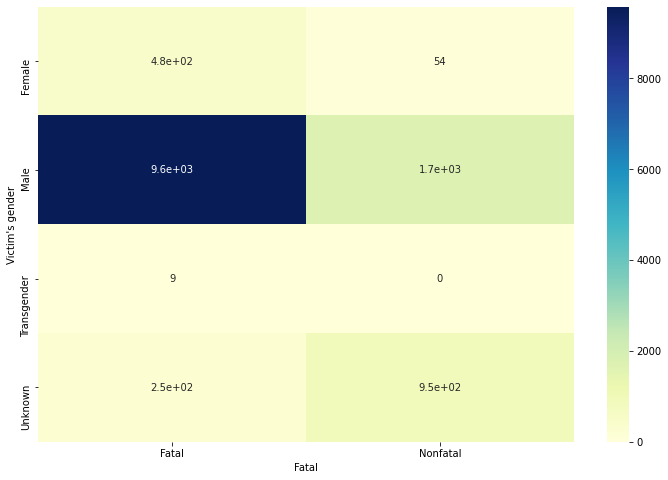

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [ ]:
c, p, dof, expected = chi2_contingency(contigency)
p

0.0

## Race
How does a victim's race impact their likelihood of being killed?

In [ ]:
import re
df["Victim's race"].value_counts()
df["Victim's race"] = df["Victim's race"].str.replace(' ', '')
df["Victim's race"] = df["Victim's race"].replace(to_replace=r"W\b", value='White',regex=True)
df["Victim's race"] = df["Victim's race"].replace(to_replace=r"white\b", value='White',regex=True)
df["Victim's race"] = df["Victim's race"].replace(to_replace=r"B\b", value='Black',regex=True)
df["Victim's race"] = df["Victim's race"].replace(to_replace=r"U\b", value='UnknownRace',regex=True)
df["Victim's race"] = df["Victim's race"].replace(to_replace=r"L\b", value='Hispanic',regex=True)
df["Victim's race"] = df["Victim's race"].replace(to_replace=r"race\b", value='Race',regex=True)
df["Victim's race"] = df["Victim's race"].replace(to_replace=r"A\b", value='Asian',regex=True)
df["Victim's race"] = df["Victim's race"].replace(to_replace=r"O\b", value='Other',regex=True)

In [ ]:
df["Victim's race"].value_counts()
df_race = df

In [ ]:
pd.crosstab(df_race["Victim's race"],df_race["Fatal"])

Fatal,Fatal,Nonfatal
Victim's race,,
Asian,149,21
Black,2705,1120
Hispanic,1777,416
NativeAmerican,122,0
Other,7,7
PacificIslander,49,0
UnknownRace,1304,856
White,4196,310


In [ ]:
contigency= pd.crosstab(df_race["Victim's race"],df_race["Fatal"])
contigency

Fatal,Fatal,Nonfatal
Victim's race,,
Asian,149,21
Black,2705,1120
Hispanic,1777,416
NativeAmerican,122,0
Other,7,7
PacificIslander,49,0
UnknownRace,1304,856
White,4196,310


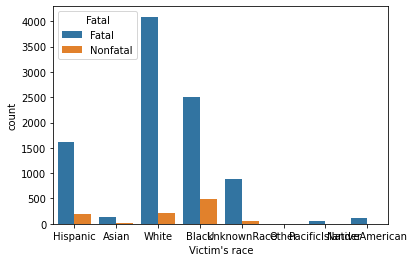

In [ ]:
sns.countplot(x="Victim's race", hue='Fatal', data=df)

In [ ]:
contigency_pct = pd.crosstab(df_race["Victim's race"],df_race["Fatal"], normalize='index')
contigency_pct

Fatal,Fatal,Nonfatal
Victim's race,,
Asian,0.876471,0.123529
Black,0.707190,0.292810
Hispanic,0.810306,0.189694
NativeAmerican,1.000000,0.000000
Other,0.500000,0.500000
PacificIslander,1.000000,0.000000
UnknownRace,0.603704,0.396296
White,0.931203,0.068797


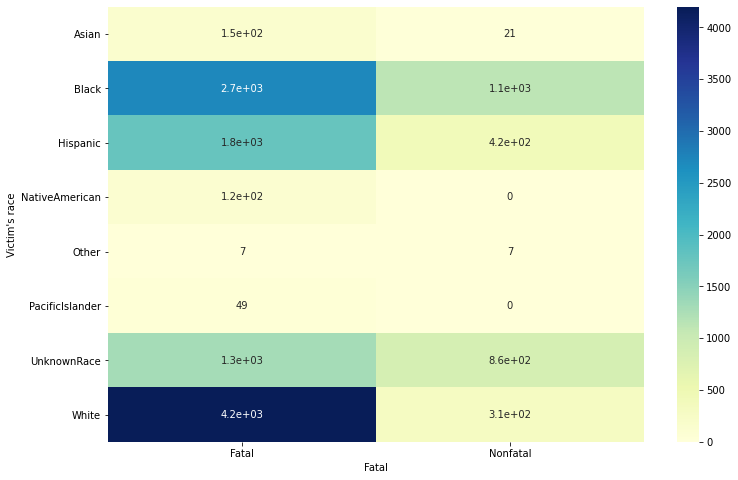

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [ ]:
c, p, dof, expected = chi2_contingency(contigency)
p

3.621922354541701e-259

What other interesting variables can we look at that might have significance in these violent outcomes?

In [ ]:
df["Armed/Unarmed Status"] = df["Armed/Unarmed Status"].replace(to_replace=r"U\b", value='Unclear',regex=True)
df["Armed/Unarmed Status"] = df["Armed/Unarmed Status"].replace(to_replace=r"N\b", value='Unarmed/Did Not Have Actual Weapon',regex=True)
df["Armed/Unarmed Status"] = df["Armed/Unarmed Status"].replace(to_replace=r"Y\b", value='Allegedly Armed',regex=True)
df["Armed/Unarmed Status"] = df["Armed/Unarmed Status"].replace(to_replace=r"armed\b", value='Armed',regex=True)
df["Armed/Unarmed Status"] = df["Armed/Unarmed Status"].replace(to_replace=r"unclear\b", value='Unclear',regex=True)

In [ ]:
df["Armed/Unarmed Status"].value_counts()

Allegedly Armed                       8045
UnArmed/Did Not Have Actual Weapon    2380
Unclear                               1575
Vehicle                                588
Allegedly Armed                          3
Name: Armed/Unarmed Status, dtype: int64

In [ ]:
sns.countplot(x="Armed/Unarmed Status", data=df)

In [ ]:
df[df['Fatal'] == 'Fatal'].mean() #averages of numeric values for those that died

NumberOfSubjects                              1.000000
Victim's age                                 36.610786
Zipcode                                   60316.520683
WaPo ID (If included in WaPo database)     3258.910046
MPV ID                                     4289.263653
Fatal Encounters ID                       20311.917380
order                                       568.851167
dtype: float64

In [ ]:
cols_to_explore = ['Body Camera (Source: WaPo)', "Victim's age", 'Symptoms of mental illness?', 'OfficerGender', 'NumberOfOfficers', 'Armed/Unarmed Status']

In [ ]:
df['Body Camera (Source: WaPo)'].value_counts()
df["Body Camera (Source: WaPo)"] = df["Body Camera (Source: WaPo)"].replace(to_replace=r"no\b", value='No',regex=True)
df["Body Camera (Source: WaPo)"] = df["Body Camera (Source: WaPo)"].replace(to_replace=r"yes\b", value='Yes',regex=True)
df["Body Camera (Source: WaPo)"] = df["Body Camera (Source: WaPo)"].replace(to_replace=r"Surveillance Video\b", value='Surveillance video',regex=True)
df["Body Camera (Source: WaPo)"] = df["Body Camera (Source: WaPo)"].replace(to_replace=r"surveillance video\b", value='Surveillance video',regex=True)
df["Body Camera (Source: WaPo)"] = df["Body Camera (Source: WaPo)"].replace(to_replace=r"Dashcam video\b", value='Dashcam Video',regex=True)
df['Body Camera (Source: WaPo)'].value_counts()

No                    5199
Yes                    632
Surveillance video       8
Bystander Video          4
Dashcam Video            3
cell phone video         1
Name: Body Camera (Source: WaPo), dtype: int64

In [ ]:
pd.crosstab(df['Fatal'],df['Armed/Unarmed Status']).transpose()

Fatal,Fatal,Nonfatal
Armed/Unarmed Status,,
Allegedly Armed,7044,1001
Allegedly Armed,1,2
UnArmed/Did Not Have Actual Weapon,1626,754
Unclear,921,654
Vehicle,588,0


In [ ]:
df["Victim's age"].value_counts()

U     2096
25     353
28     351
27     349
31     345
      ... 
95       1
93       1
10       1
7        1
4        1
Name: Victim's age, Length: 99, dtype: int64

In [ ]:
drop_vals = ('U','40s','50-59','Juvenile','UNKNOWN','Unknown','21-23','0-19','20-29','30-39','40-49','NaN')
for i in drop_vals:
  df.drop(df.loc[df["Victim's age"]== i].index, inplace=True)

df["Victim's age"].value_counts()

25     353
28     351
27     349
31     345
26     345
      ... 
10       1
7        1
93       1
4        1
107      1
Name: Victim's age, Length: 88, dtype: int64

In [ ]:
pd.crosstab(df['Fatal'],df["Victim's age"]).transpose()

Fatal,Fatal,Nonfatal
Victim's age,,
1,3,0
4,0,1
5,3,0
6,3,0
7,1,0
...,...,...
89,2,0
91,2,0
93,1,0


In [ ]:
df['Victim\'s age'].value_counts().sort_index(ascending=False).sort_values(ascending=False)

25     353
28     351
27     349
31     345
26     345
      ... 
85       1
88       1
93       1
95       1
107      1
Name: Victim's age, Length: 88, dtype: int64